## Equipo 48

| Nombre | Matrícula |
| ------ | --------- |
| André Zaragoza  | A01797076 |
| Héctor Santillán | A01633395 |
| Pablo de Jesus González | A01321850 |
| Delbert Custodio | A01795613 |
| Abel Diaz | A00566705 |

# Dataset a trabajar: Seoul Bike Sharing Demand

El dataset conocido como `Seoul Bike Sharing Demand` es una serie de registros los cuales fueron recabados en Febrero de 2020. El dataset contiene 13 columnas y 8760 registros en su formato original.

Las columnas o features que se encuentran en el dataset son los siguientes:

| Feature | Tipo | Notas |
| ------- | ---- | ----- |
| Date    | Temporal | Contiene la fecha en que se llevó a cabo un registro. Su formato es DD-MM-YYYY. |
| Rented Bike Count | Entero | Muestra la cantidad de bicicletas que se rentaron a cierta hora en cierta fecha. |
| Hour    | Temporal | Es la hora del día en que se registraron la cantidad de bicicletas rentadas respecto a la hora anterior. |
| Temperature(°C) | Continua | Es la temperatura en grados Celsius que se registró en cierta fecha y hora del ambiente. |
| Humidity(%) | Entero | Es la humedad relativa del ambiente (en %) registrada en la fecha y hora del registro. |
| Wind speed (m/s) | Continua | La velocidad del viento en m/s registrada en la fecha y hora correspondientes. |
| Visibility (10m) | Entero | Visibilidad en factores de 10 metros. |
| Dew point temperature(°C) | Continua | Es la temperatura en la cual el aire se satura de humedad. |
| Solar Radiation (MJ/m²)  | Continua | Cantidad o medida de radiación solar absorbida por unidad de área. | 
| Rainfall(mm) | Continua | Cantidad de lluvia registrada en milimetros. |
| Snowfall (cm) | Continua | Cantidad de nieve registrada, en milimetros. | 
| Seasons | Categorica, nominal. | La época o temporada del año. |
| Holiday | Binaria o Booleana | Indica si la fecha registada es una festividad. |
| Functioning Day | Binaria. | Indica si el servicio de renta de bicicletas operó o no en la fecha indicada. |

<br>
<br>

Respecto al dataset modificado, podemos encontrar una columna extra:

| Feature | Tipo | Notas |
| ------- | ---- | ----- |
| mixed_type_col | Desconocida | Debemos analizar la columna en nuestro EDA. |

# Problemática a resolver

Según la página de UCI sobre el dataset original, se introdujo la posibilidad de rentar bicicletas en distintas ciudades para mejorar la movilidad dentro de las zonas urbanas. Con esto, un aspecto importante es poder suplir la demanda de bicicletas que se puedan rentar a cualquier hora del día, ya que:

- El esperar mucho tiempo para rentar una bicicleta puede causar que el uso de éstas se reduzca.
- Utilizar una bicicleta para moverse dentro de una ciudad reduce el tráfico vehicular para evitar congestionamientos, por lo que es un indispensable cubrir la demanda de bicicletas que se necesiten durante el día y sobre todo a horas pico.

Por lo anterior, el dataset produce una base sólida para trabajar un modelo de regresión que pueda predecir la demanda de bicicletas que se tendrá por cada hora del día. Esta predicción ayudará a que las autoridades puedan mantener una oferta de bicicletas acorde a las necesidades de la población, y a planificar de mejor manera la cantida de bicicletas a adquirir y dar mantenimiento.

Por lo tanto, la variable a predecir para resolver la problemática es `Rented_Bike_Count`.

# Inicialización y Carga de Datos 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el Dataset
#df = pd.read_csv('./csv/seoul_bike_sharing_original.csv')
df = pd.read_csv('./csv/seoul_bike_sharing_modified.csv')
print("Dataset cargado exitosamente. Las primeras 5 filas:")

df.head(5)

Dataset cargado exitosamente. Las primeras 5 filas:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mixed_type_col
0,01/12/2017,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,876
1,01/12/2017,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,798
2,01/12/2017,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,231
3,01/12/2017,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,bad
4,01/12/2017,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,536


In [2]:
# 2. Renombrar y Estandarizar Columnas
# Eliminaremos los espacios entre los nombres de los features para reemplazarlos por underscores (_)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'rented_bike_count': 'demanda'}, inplace=True)

# Imprimimos las nuevas columnas
print('Columnas a trabajar:\n')
df.dtypes

Columnas a trabajar:



date                         object
demanda                      object
hour                         object
temperature(°c)              object
humidity(%)                  object
wind_speed_(m/s)             object
visibility_(10m)             object
dew_point_temperature(°c)    object
solar_radiation_(mj/m2)      object
rainfall(mm)                 object
snowfall_(cm)                object
seasons                      object
holiday                      object
functioning_day              object
mixed_type_col               object
dtype: object

In [3]:
len(df)

8935

En este punto es posible darnos cuenta de que contamos con un dataset el cual:

- Contiene "ruido" en las variables de tipo numérico.
- Variablles o features que deberían ser binarios contienen valores extraños (`holiday` y `functioning_day` son un claro ejemplo de ésto).

# Limpieza de nuestro dataset

### Para `date`

Notamos que algunos valores de `date` tienen espacios en blanco que podrían darnos problemas más adelante. Por lo que procedemos a hacer un strip de las fechas.

In [4]:
def clean_date_column(value_to_clean):
    
    if value_to_clean is None or value_to_clean == '':
        return None
    
    cleaned = str(value_to_clean).strip()
    
    if cleaned.lower() == 'nan':
        return None
    
    return cleaned

df['date'] = df['date'].apply(clean_date_column)

### Limpieza de `holiday`, `functioning_day` y `seasons`

Notamos que los valores válidos para estos features son los siguientes:

- `Para holiday`: `No holiday` & `Holiday`.
- `Para functioning_day`: `Yes` & `No`.

In [5]:
print( f"Valores únicos para `holiday`: {df['holiday'].unique()}" )
print( f"Valores únicos para `functioning_day`: {df['functioning_day'].unique()}" )
print( f"Valores únicos para `seasons`: {df['seasons'].unique()}" )

Valores únicos para `holiday`: ['No Holiday' ' nO hOLIDAY ' nan ' hOLIDAY ' 'Holiday' ' NAN ']
Valores únicos para `functioning_day`: ['Yes' ' yES ' ' NAN ' nan 'No' ' nO ']
Valores únicos para `seasons`: ['Winter' ' wINTER ' nan ' NAN ' 'Spring' ' sPRING ' 'Summer' ' sUMMER '
 'Autumn' ' aUTUMN ']


#### Para `holiday`

Por lo tanto, ahora procedemos a trabajar sobre `Holiday` para asegurarnos que los valores en nuestro dataset sean correctos.

In [6]:
def correct_holiday_values( value_to_clean ):
    
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    else:
        value_to_clean = str(value_to_clean).lower()
        value_to_clean = value_to_clean.strip()
    
        if value_to_clean == 'holiday':
            return 'yes'
        elif value_to_clean == 'no holiday':
            return 'no'
        
df['Holiday_or_not'] = df['holiday'].apply(correct_holiday_values)
print( f"Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `holiday`: {df['Holiday_or_not'].unique()}")

Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `holiday`: ['no' None 'yes']


In [7]:
# Copiamos los valores obtenidos para holiday y eliminamos la columna que usamos para limpiar esta data

df['holiday'] = df['Holiday_or_not']
df.drop(columns=['Holiday_or_not'], inplace=True)


In [8]:
# Ahora revisamos qué fechas tienen valores None en la columna de holiday para investigar si estos fueron días festivos en Seoul.

print( df.loc[df['holiday'].isna(), 'date'].unique() )

['10/12/2017' '17/12/2017' '19/12/2017' '20/12/2017' '21/12/2017'
 '22/12/2017' '23/12/2017' '26/12/2017' '29/12/2017' '30/12/2017'
 '05/01/2018' '09/01/2018' '14/01/2018' '19/01/2018' '21/01/2018'
 '23/01/2018' '27/02/2018' '28/02/2018' '01/03/2018' '18/03/2018'
 '20/03/2018' '21/03/2018' '23/03/2018' '09/04/2018' '16/04/2018' None
 '26/04/2018' '27/04/2018' '02/05/2018' '06/05/2018' '19/05/2018'
 '20/05/2018' '22/05/2018' '23/05/2018' '27/05/2018' '11/06/2018'
 '12/06/2018' '18/06/2018' '19/06/2018' '25/06/2018' '08/07/2018'
 '11/07/2018' '13/07/2018' '24/07/2018' '25/07/2018' '30/07/2018'
 '31/07/2018' '03/08/2018' '13/08/2018' '22/08/2018' '31/08/2018'
 '02/09/2018' '05/09/2018' '14/09/2018' '20/09/2018' '22/09/2018'
 '23/09/2018' '30/09/2018' '05/10/2018' '15/10/2018' '27/10/2018'
 '28/10/2018' '31/10/2018' '02/11/2018' '06/11/2018' '12/11/2018'
 '13/11/2018' '14/11/2018' '22/11/2018' '23/11/2018' '25/11/2018'
 '30/11/2018' '15/11/2018' '28/04/2018']


Y luego de una búsqueda rápida en internet, las siguientes fechas fueron festivas en Seoul:

- 01/03/2018
- 22/05/2018

In [9]:
# Entonces, procedemos a cambiar los valores None por 'yes' o 'no' con base en la fecha de registro.
# En este paso, existe un registro con fecha NaN que tomará el valor de 'no', pero esto podemos trabajarlo después.

festive_dates = ['01/03/2018', '22/05/2018']

df['holiday'] = [ 
                 'yes' if  (h is None and d in festive_dates)
                 else 'no' if (h is None and d not in festive_dates)
                 else h for d,h in zip(df['date'], df['holiday'])]

df['holiday'].unique()

array(['no', 'yes'], dtype=object)

#### Para `functioning_day`

Al correr el código de abajo es posible notar que no se encontró algún valor None o vacío en la columna `functioning_day` al usar una función similar al procesamiento de `holiday`, por lo que en este paso procedemos solamente a modificar los valores de `functioning_day` según lo obtenido por nuestra función.

In [10]:
def correct_functioning_day_values( value_to_clean):
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    
    else:
        
        value_to_clean = str(value_to_clean).lower()
        value_to_clean = value_to_clean.strip()
    
        if value_to_clean == 'yes':
            return 'yes'
        else:
            return 'no'
        
df['functioning_day_or_not'] = df['functioning_day'].apply(correct_functioning_day_values)
print( f"Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `functioning_day`: {df['functioning_day_or_not'].unique()}")

Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `functioning_day`: ['yes' 'no']


In [11]:
df['functioning_day'] = df['functioning_day_or_not']
df.drop(columns=['functioning_day_or_not'], inplace=True)
df['functioning_day'].unique()

array(['yes', 'no'], dtype=object)

Y ahora procedemos a revisar la distribución de cada 

#### Para `seasons`

In [12]:
df['seasons'].unique()

array(['Winter', ' wINTER ', nan, ' NAN ', 'Spring', ' sPRING ', 'Summer',
       ' sUMMER ', 'Autumn', ' aUTUMN '], dtype=object)

In [13]:
def correct_season_values( value_to_clean):
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    
    else:
        value_to_clean = str(value_to_clean).strip().lower()
        
        if value_to_clean == 'nan':
            return None
        
        return value_to_clean
        
df['seasons_corrected'] = df['seasons'].apply(correct_season_values)
df['seasons_corrected'].unique()

array(['winter', None, 'spring', 'summer', 'autumn'], dtype=object)

In [14]:
df['seasons'] = df['seasons_corrected']
df.drop(columns=['seasons_corrected'], inplace=True)

print(f"Valores unicos para `seasons` luego de aplicar la corrección: {df['seasons'].unique()}")

Valores unicos para `seasons` luego de aplicar la corrección: ['winter' None 'spring' 'summer' 'autumn']


In [15]:
# Verificamos las fechas en donde tenemos None

print( df.loc[df['seasons'].isna(), 'date'].unique() )

['06/12/2017' '14/12/2017' '16/12/2017' '27/12/2017' '01/01/2018'
 '12/01/2018' '14/01/2018' '17/01/2018' '18/01/2018' '21/01/2018'
 '27/01/2018' '30/01/2018' '05/02/2018' '09/02/2018' '19/02/2018'
 '20/02/2018' '25/02/2018' '26/02/2018' '28/02/2018' None '02/03/2018'
 '05/03/2018' '08/03/2018' '22/03/2018' '26/03/2018' '27/03/2018'
 '29/03/2018' '02/04/2018' '04/04/2018' '14/04/2018' '16/04/2018'
 '18/04/2018' '21/04/2018' '22/04/2018' '11/05/2018' '24/05/2018'
 '10/06/2018' '18/06/2018' '25/06/2018' '28/06/2018' '29/06/2018'
 '07/07/2018' '08/07/2018' '16/07/2018' '18/07/2018' '19/07/2018'
 '22/07/2018' '25/07/2018' '31/07/2018' '01/08/2018' '02/08/2018'
 '07/08/2018' '10/08/2018' '22/08/2018' '29/08/2018' '02/09/2018'
 '03/09/2018' '11/09/2018' '13/09/2018' '17/09/2018' '18/09/2018'
 '13/10/2018' '14/10/2018' '17/10/2018' '24/10/2018' '04/11/2018'
 '08/11/2018' '10/11/2018' '13/11/2018' '19/11/2018' '20/11/2018'
 '23/11/2018' '29/11/2018' '30/11/2018' '07/05/2018' '04/08/2018']


Y luego de una búsqueda rápida en Internet obtenemos cuales fechas pertenecen al invierno, verano, otoño y primavera en Seoul.

In [16]:
winter_dates = [
'06/12/2017', '14/12/2017', '16/12/2017', '27/12/2017', '01/01/2018',
'12/01/2018', '14/01/2018', '17/01/2018', '18/01/2018', '21/01/2018',
'27/01/2018', '30/01/2018', '05/02/2018', '09/02/2018', '19/02/2018',
'20/02/2018', '25/02/2018', '26/02/2018', '28/02/2018'
]

spring_dates = [
'02/03/2018', '05/03/2018', '08/03/2018', '22/03/2018', '26/03/2018',
'27/03/2018', '29/03/2018', '02/04/2018', '04/04/2018', '14/04/2018',
'16/04/2018', '18/04/2018', '21/04/2018', '22/04/2018', '07/05/2018',
'11/05/2018', '24/05/2018'
]

summer_dates = [
'10/06/2018', '18/06/2018', '25/06/2018', '28/06/2018', '29/06/2018',
'07/07/2018', '08/07/2018', '16/07/2018', '18/07/2018', '19/07/2018',
'22/07/2018', '25/07/2018', '31/07/2018', '01/08/2018', '02/08/2018',
'04/08/2018', '07/08/2018', '10/08/2018', '22/08/2018', '29/08/2018'
]

autumn_dates = [
'02/09/2018', '03/09/2018', '11/09/2018', '13/09/2018', '17/09/2018',
'18/09/2018', '13/10/2018', '14/10/2018', '17/10/2018', '24/10/2018',
'04/11/2018', '08/11/2018', '10/11/2018', '13/11/2018', '19/11/2018',
'20/11/2018', '23/11/2018', '29/11/2018', '30/11/2018'
]



df['seasons'] = [ 
                      'winter' if (s is None and d in winter_dates)
                 else 'spring' if (s is None and d in spring_dates)
                 else 'summer' if (s is None and d in summer_dates)
                 else 'autumn' if (s is None and d in autumn_dates)
                 else s for d,s in zip(df['date'], df['seasons'])]

df['seasons'].unique()

array(['winter', 'spring', None, 'summer', 'autumn'], dtype=object)

Y verificamos que solamente las columnas que tengan `None` en `Date` deben aparecer con valores nulos.

In [17]:
print( df.loc[df['seasons'].isna(), 'date'].unique() )

[None]


### Variables numéricas

#### Para `Rented_bikes`

In [18]:
import numpy as np

def check_if_numeric_value ( value_to_check):
    
    try:
        float(value_to_check)
        return float(value_to_check)
    except:
        return np.nan
    
    
df['clean_demanda'] = df['demanda'].apply(check_if_numeric_value)

In [19]:
df['clean_demanda'].isna().value_counts()

clean_demanda
False    8799
True      136
Name: count, dtype: int64

Al revisar la cantidad de valores nulos o vacíos en la variable objetivo `demanda`, es posible calcular que el 1.52% de los registros no tiene un valor válido. Entonces, hemos decidido eliminar estos registros ya que:

- Al ser `demanda` la variable objetivo o a predecir, el imputar o agregar valores podría introducir sesgos bastante fuertes en nuestro modelo.

Por lo anterior, decidimos utilizar solo información real.

In [20]:
df.dropna(subset=['clean_demanda'], inplace=True)
df['clean_demanda'].isna().value_counts()

clean_demanda
False    8799
Name: count, dtype: int64

### Para `mixed_type_col`

In [21]:
len(df['mixed_type_col'].unique())

1001

In [22]:
df['mixed_type_col'].value_counts().head(20)

mixed_type_col
bad        897
unknown    890
583         16
11          16
161         15
183         14
972         14
603         13
516         13
950         13
241         13
948         12
86          12
679         12
713         12
333         12
168         12
181         12
980         12
219         12
Name: count, dtype: int64

In [23]:
df['mixed_type_col'].isna().sum() / len(df) * 100

np.float64(9.512444595976815)

Al revisar el Top 20 de valores, notamos que no existe alguna ventaja en mantener la columna `mixed_type_column`. Nuestros criterios son los siguientes:

- El 9.5% de los datos es vacío o nulo.
- El top 20 de valores únicos muestra una mezcla de valores categóricos y numéricos.
- El nombre de la columna no nos da información extra para comprender lo que quiere decir.
- No fue posible hallar alguna documentación sobre cómo se creó esta columna en el sitio oficial de UCI para el dataset en cuestión.

In [24]:
df.drop(columns=['mixed_type_col'], inplace= True)
df.dtypes

date                          object
demanda                       object
hour                          object
temperature(°c)               object
humidity(%)                   object
wind_speed_(m/s)              object
visibility_(10m)              object
dew_point_temperature(°c)     object
solar_radiation_(mj/m2)       object
rainfall(mm)                  object
snowfall_(cm)                 object
seasons                       object
holiday                       object
functioning_day               object
clean_demanda                float64
dtype: object

### Para `temperature`, `humidity`, `wind_speed`, `solar_radiation`, `rainfall`, `snowfall`, `dew_point` y `visibility_(10m)`

In [25]:
weather_cols = [
    'temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)'
]

In [26]:
df.isna().sum() / len(df) * 100

date                         0.943289
demanda                      0.000000
hour                         1.272872
temperature(°c)              1.011479
humidity(%)                  1.091033
wind_speed_(m/s)             1.386521
visibility_(10m)             1.022844
dew_point_temperature(°c)    1.125128
solar_radiation_(mj/m2)      0.977384
rainfall(mm)                 0.897829
snowfall_(cm)                1.113763
seasons                      0.034095
holiday                      0.000000
functioning_day              0.000000
clean_demanda                0.000000
dtype: float64

Notamos que el porcentaje de valores nulos en cada una de éstas variables es bajo (no se supera el 5% de los datos), por lo que tenemos algunas estrategias para rellenar esta data:

- Utilizar una medida de tendencia central como la `media` o `mediana`. Esto ignora los patrones climatológicos, por lo que no es la mejor estrategia.
- Buscar una manera de tomar en cuenta la hora del día y la temporada (`season`) para calcular el promedio.
- Usar alguna técnica como Forward-Fill o Backward-Fill, lo que en algunos estudios se recomienda para data que se encuentra ordenada con base al tiempo.


Por lo anterior, hemos decidido utilizar forwardfill y backwardfill en estas variables, ya que:

- Las mismas dependen del mes, día y hora.
- Están correlacionadas fuertemente con la fecha (ejemplo: en Seoul siempre llueve en invierno, llueve o no llueve en verano, etc.)


Pero antes de trabajar con los valores vacíos, debemos asegurarnos de que estas columnas no contengan alguna mezcla de tipos de datos (texto y numeros, por ejemplo).

In [27]:
# Primero chequearemos cuales registros no cuentan con un valor válido en alguna de estas columnas, y colocaremos NaN en donde no se encuentra algún valor
# numérico.

for col in weather_cols:
    df[ f"{col}" ] = df[ f"{col}"].apply(check_if_numeric_value)
    
for col in weather_cols:
    nan_count = df[col].isna().sum()
    total = len(df)
    print(f"{col} : {nan_count:>4} NaN ({nan_count/total*100:>5.2f}%)")

temperature(°c) :  116 NaN ( 1.32%)
humidity(%) :  129 NaN ( 1.47%)
wind_speed_(m/s) :  157 NaN ( 1.78%)
visibility_(10m) :  130 NaN ( 1.48%)
dew_point_temperature(°c) :  129 NaN ( 1.47%)
solar_radiation_(mj/m2) :  109 NaN ( 1.24%)
rainfall(mm) :  114 NaN ( 1.30%)
snowfall_(cm) :  125 NaN ( 1.42%)


<Axes: >

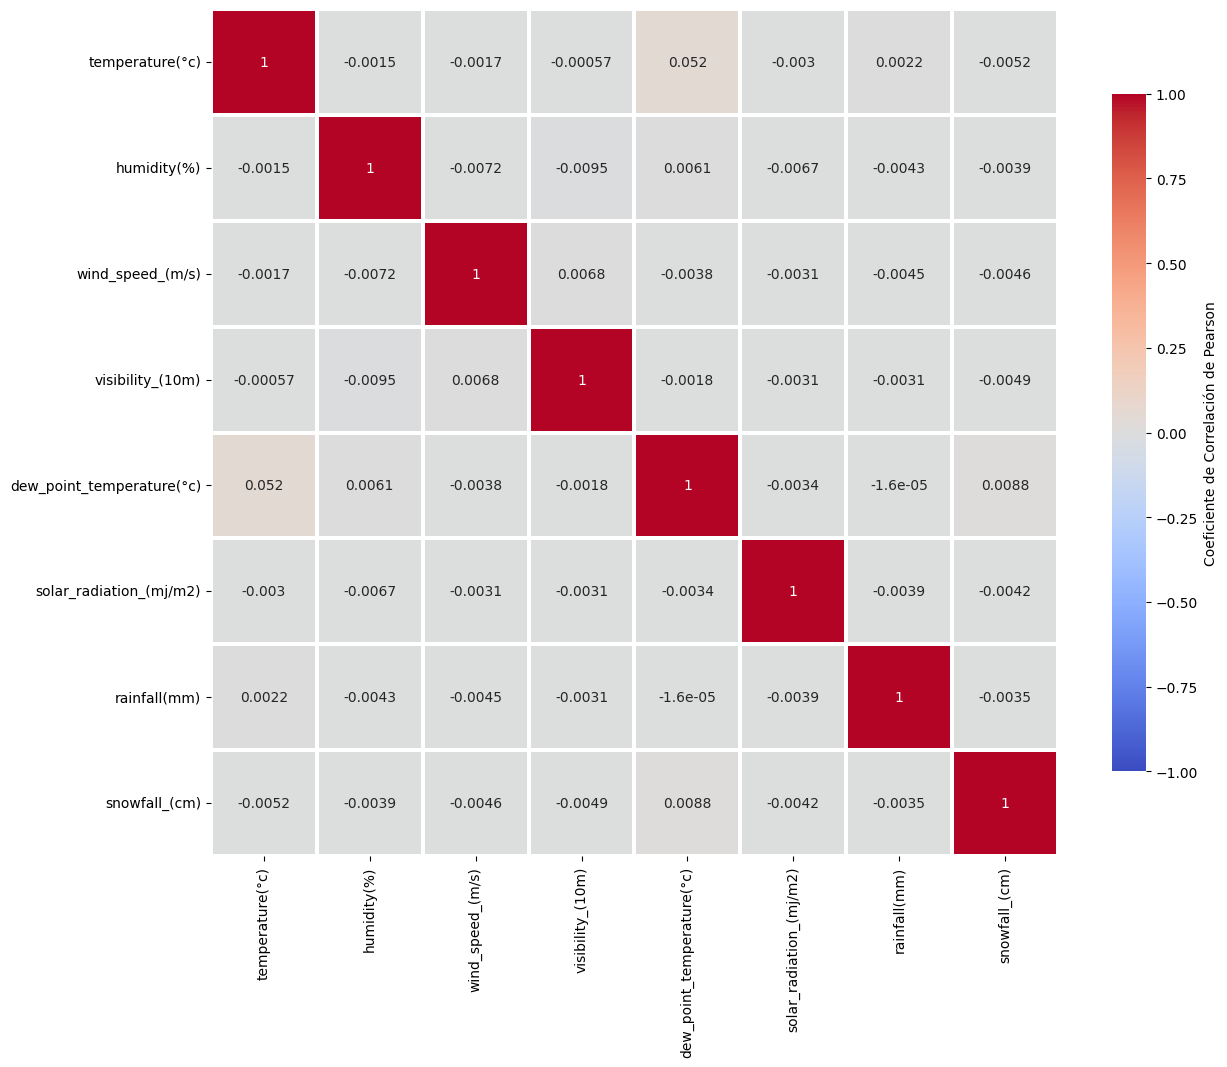

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[weather_cols].corr(method='pearson')

plt.figure(figsize=(14, 11))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    square=True,             
    linewidths=1.5,          
    linecolor='white',       
    cbar_kws={
        'shrink': 0.8,
        'label': 'Coeficiente de Correlación de Pearson'
    },
    vmin=-1,                 
    vmax=1,                  
    annot_kws={'size': 10}
)

Ahora haremos una matriz de correlación de Pearson para confirmar si existe alguna correlación fuerte entre nuestras variables de clima. Esto ayudará a que luego de hacer la estrategia de imputación podamos comprobar si las correlaciones se siguen manteniendo.

In [29]:
# Y ahora trabajamos en usar un ForwarFill seguido de un backwardfill
for col in weather_cols:
    
    df[f"{col}"] = df[f"{col}"].fillna(method= 'ffill')
    df[f"{col}"] = df[f"{col}"].fillna(method= 'bfill')

for col in weather_cols:
    print( f"Cantidad de registros NaN de la columna {col}: {df[f"{col}"].isna().sum()}")
    print("\n")

Cantidad de registros NaN de la columna temperature(°c): 0


Cantidad de registros NaN de la columna humidity(%): 0


Cantidad de registros NaN de la columna wind_speed_(m/s): 0


Cantidad de registros NaN de la columna visibility_(10m): 0


Cantidad de registros NaN de la columna dew_point_temperature(°c): 0


Cantidad de registros NaN de la columna solar_radiation_(mj/m2): 0


Cantidad de registros NaN de la columna rainfall(mm): 0


Cantidad de registros NaN de la columna snowfall_(cm): 0




/tmp/ipykernel_31677/2148494748.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f"{col}"] = df[f"{col}"].fillna(method= 'ffill')
/tmp/ipykernel_31677/2148494748.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f"{col}"] = df[f"{col}"].fillna(method= 'bfill')


Ahora comprobamos que las correlaciones no se hayan modificado demasiado al usar `ffill` y `bfill`.

<Axes: >

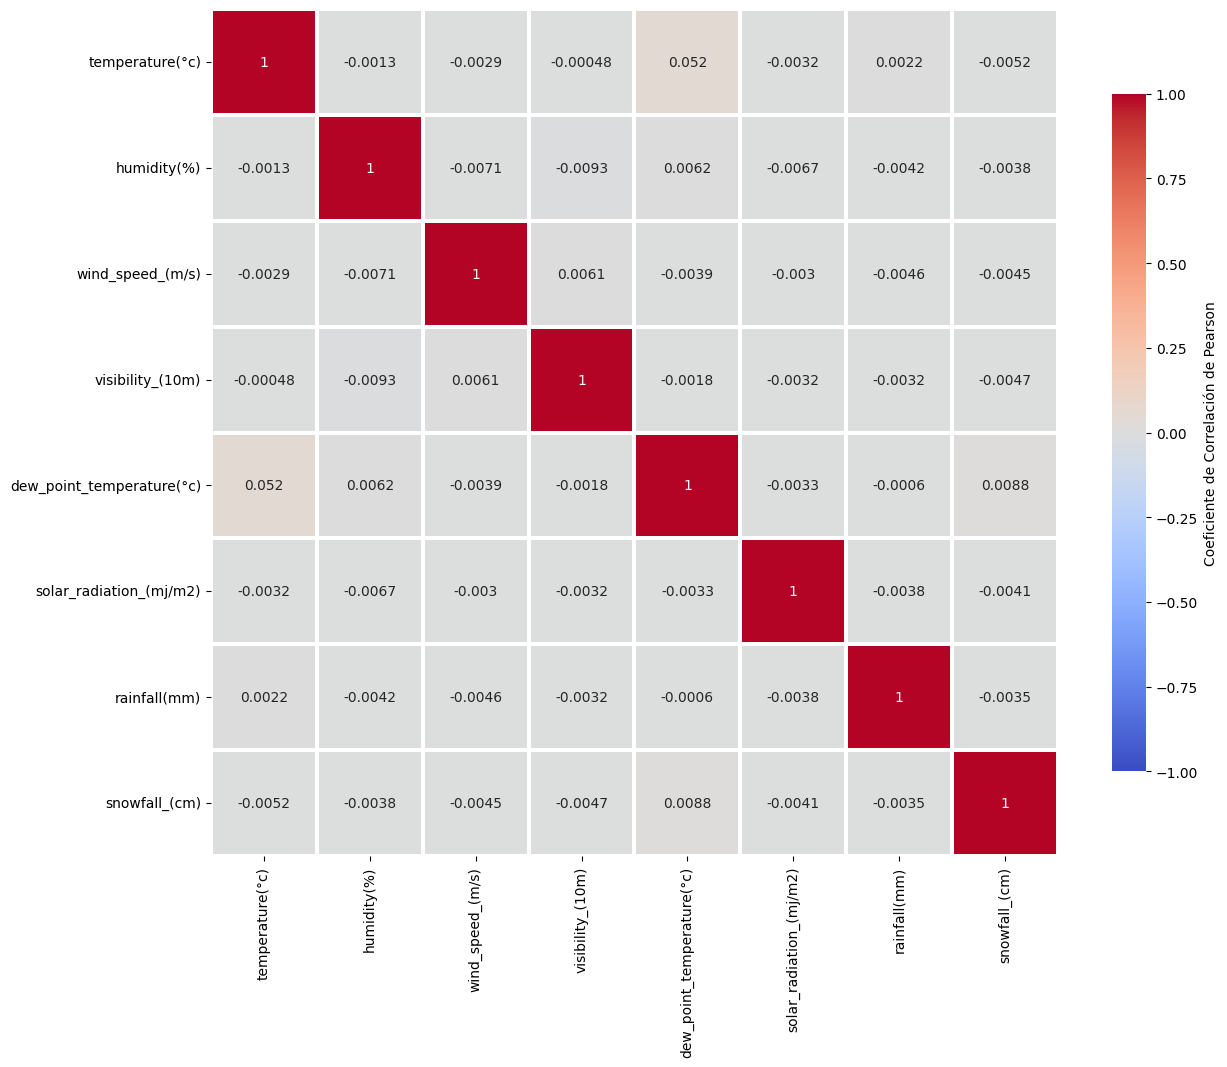

In [30]:
correlation_matrix = df[weather_cols].corr(method='pearson')

plt.figure(figsize=(14, 11))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    square=True,             
    linewidths=1.5,          
    linecolor='white',       
    cbar_kws={
        'shrink': 0.8,
        'label': 'Coeficiente de Correlación de Pearson'
    },
    vmin=-1,                 
    vmax=1,                  
    annot_kws={'size': 10}
)

Por último, notamos que ya no contamos con valores NaN en nuestras columnas de clima luego de usar `ffill` y `bfill` en nuestro dataset.

In [31]:
df.isna().sum() / len(df) * 100

date                         0.943289
demanda                      0.000000
hour                         1.272872
temperature(°c)              0.000000
humidity(%)                  0.000000
wind_speed_(m/s)             0.000000
visibility_(10m)             0.000000
dew_point_temperature(°c)    0.000000
solar_radiation_(mj/m2)      0.000000
rainfall(mm)                 0.000000
snowfall_(cm)                0.000000
seasons                      0.034095
holiday                      0.000000
functioning_day              0.000000
clean_demanda                0.000000
dtype: float64

### Sobre los valores nulos o vacíos de para `date`, `hour` y `seasons

En este punto, luego de aplicar la limpieza e inserción de valores faltantes, podemos notar que `date` y `hour` son registros críticos que necesitamos conocer. Por lo tanto, trabajar una estrategia de inserción no es la mejor  idea porque:

- Podríamos alterar la estacionalidad de los datos.
- No tenemos la certeza de que el Dataset contenga alguna secuencia temporal definida para los registros que tienen valores faltantes en estas dos features


Por lo tanto, decidimos eliminar aquellos registros que tengan valores nulos en `date` y `hour`.

In [32]:
df.dropna(subset=['date', 'hour'], inplace=True)
df.isna().sum() / len(df) * 100

date                         0.0
demanda                      0.0
hour                         0.0
temperature(°c)              0.0
humidity(%)                  0.0
wind_speed_(m/s)             0.0
visibility_(10m)             0.0
dew_point_temperature(°c)    0.0
solar_radiation_(mj/m2)      0.0
rainfall(mm)                 0.0
snowfall_(cm)                0.0
seasons                      0.0
holiday                      0.0
functioning_day              0.0
clean_demanda                0.0
dtype: float64

Y por último, notamos que al eliminar los registros con valores nulos en `date` y `hour` logramos solventar la situación también para la columna `seasons`.

In [33]:
print(f"El dataset final a trabajar para nuestro EDA contiene {len(df)} registros.")

El dataset final a trabajar para nuestro EDA contiene 8605 registros.


Por último, guardaremos nuestro dataset en limpia y luego lo versionaremos haciendo uso de `DVC`.

In [34]:
df.drop(labels=['demanda'],  axis=1 , inplace=True)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
df.to_csv("csv/seoul_bike_sharing_cleaned.csv")

# Exploratory Data Analysis (EDA)

Primero revisamos que todas nuestras variables sean del tipo correcto...

In [35]:
df.dtypes

date                         datetime64[ns]
hour                                float64
temperature(°c)                     float64
humidity(%)                         float64
wind_speed_(m/s)                    float64
visibility_(10m)                    float64
dew_point_temperature(°c)           float64
solar_radiation_(mj/m2)             float64
rainfall(mm)                        float64
snowfall_(cm)                       float64
seasons                              object
holiday                              object
functioning_day                      object
clean_demanda                       float64
dtype: object

### `EDA`

Revisando las estadísticas descriptivas básicas encontramos lo siguiente:

***Variables categóricas:***

- Contamos con data de diciembre de 2017 a noviembre de 2018 (casi 1 año de información)
- Tenemos registros para las 4 temporadas del clima.
- Como es de esperarse, existen más días registrados como que no son `feriados` a que sí lo sean.
- El mayor porcentaje de días registrados indica que fueron `funcionales` (como era de esperarse).

<br>

***Variables numéricas:***

Sobre `hora`:
  - Llama nuestra atención que la media de la hora sea  a las 17 horas.
  - Notamos que la desviación estándar de `hour` es bastante alta. Esto nos indica que de seguro tenemos outliers extremos, ya que una desviación estándar de `65` sobre un valor que como máximo es de 24 nos  indica que tenemos problemas en el dataset. Esto se confirma con el valor máximo de `1932`.
<br>

Sobre las `variables climáticas`:
- Nuevamente notamos desviaciones estándar elevadas en `temperature`, `humidity`, `visibilidad`, `dew_point_temperature`, `solar_radiation` y `clean_demanda` (nuestra variable a predecir)
- Tomando en cuenta los valores atípicos, es posible ver que la media se está viendo bastante afectada por estos outliers.
- Existen algunas variables con valores mínimos  sin sentido. Un ejemplo es `temperature` con -1119.3 grados centígrados, y `dew_point_temperature` con -2031.5 grados centígrados.
<br>

Por lo anterior, es bastante probable que debamos decidir qué hacer con estos outliers tan fuertes.

In [36]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
hour,8567.0,17.125832,65.740462,0.0,6.0,12.00,18.00,1932.00
temperature(°c),8605.0,17.903544,72.253866,-1119.3,3.5,13.90,22.70,2310.00
humidity(%),8605.0,80.165601,295.012989,0.0,43.0,57.00,75.00,7326.00
wind_speed_(m/s),8605.0,4.712923,41.914000,0.0,1.0,1.50,2.40,992.80
visibility_(10m),8605.0,1795.880999,6204.727304,27.0,946.0,1714.00,2000.00,187011.00
dew_point_temperature(°c),8605.0,7.446729,68.962844,-2031.5,-4.6,5.20,15.00,1926.40
solar_radiation_(mj/m2),8605.0,4.095055,50.157817,0.0,0.0,0.01,0.96,1001.35
rainfall(mm),8605.0,2.434433,38.591445,0.0,0.0,0.00,0.00,986.00
snowfall_(cm),8605.0,2.386810,38.547466,0.0,0.0,0.00,0.00,997.00
clean_demanda,8605.0,892.290296,3692.672079,0.0,195.0,515.00,1074.00,155643.00


In [37]:
df.describe(exclude='number')

,date,seasons,holiday,functioning_day
count,8605,8605,8605,8605
unique,NaN,4,2,2
top,NaN,summer,no,yes
freq,NaN,2170,8182,8219
mean,2018-06-01 04:53:21.301568768,NaN,NaN,NaN
min,2017-12-01 00:00:00,NaN,NaN,NaN
25%,2018-03-02 00:00:00,NaN,NaN,NaN
50%,2018-06-01 00:00:00,NaN,NaN,NaN
75%,2018-09-01 00:00:00,NaN,NaN,NaN
max,2018-11-30 00:00:00,NaN,NaN,NaN


### Empezamos por los outliers

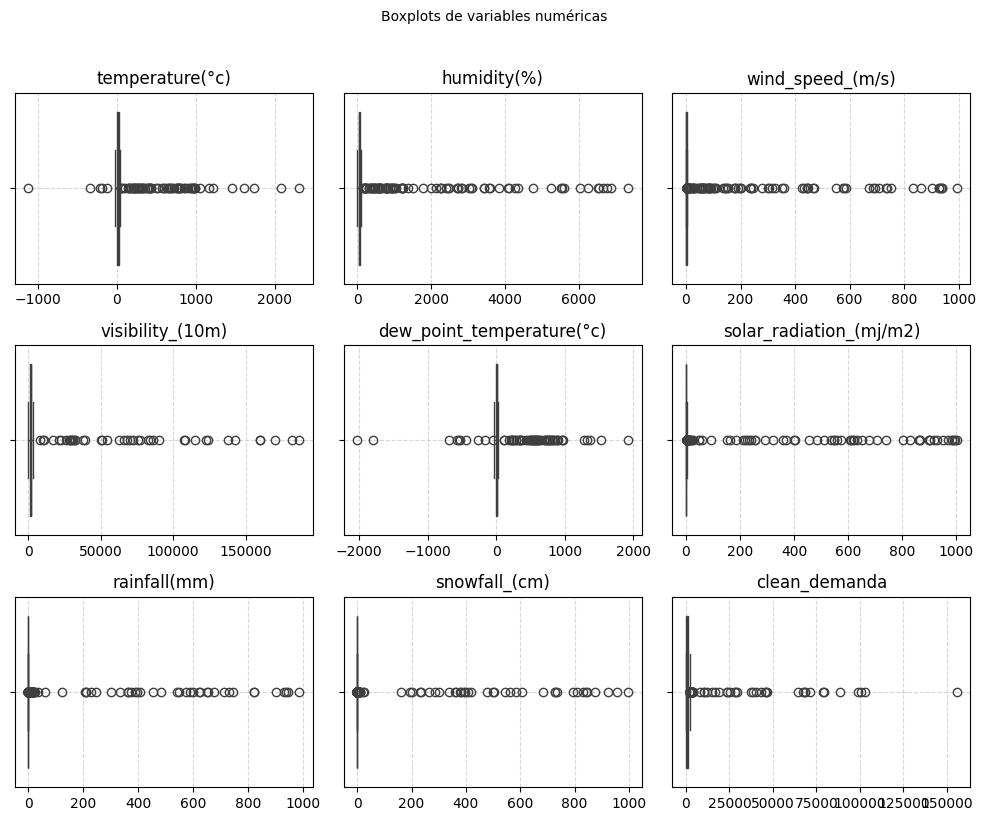

In [38]:
numerical_cols = [ 
                  'temperature(°c)',
                  'humidity(%)',
                  'wind_speed_(m/s)',
                  'visibility_(10m)',
                  'dew_point_temperature(°c)',
                  'solar_radiation_(mj/m2)',
                  'rainfall(mm)',
                  'snowfall_(cm)',
                  'clean_demanda']

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, color='lightseagreen', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Boxplots de variables numéricas', fontsize=10, y=1.02)
plt.tight_layout()
plt.show()

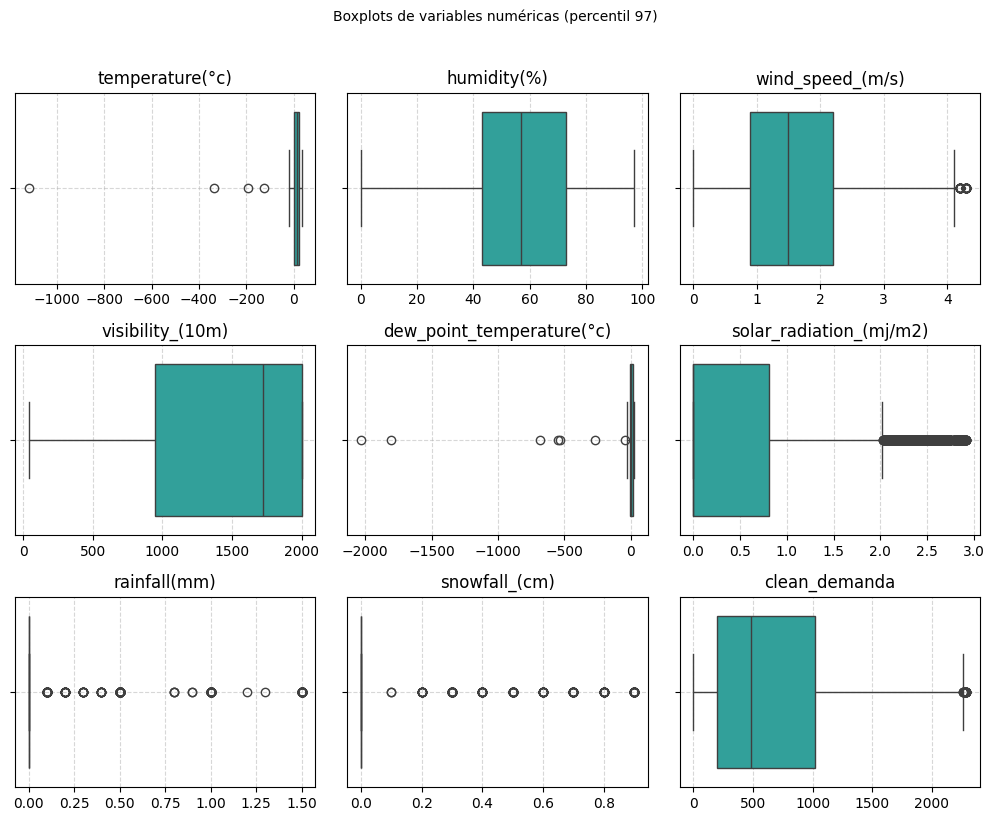

In [39]:
# Ahora  usaremos el percentil 95 para detectar si tenemos data manipulada

df_97 = df.copy()

for col in numerical_cols:
    upper_limit = df[col].quantile(0.97)
    df_97 = df_97[ df_97[col] <= upper_limit ]
    
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_97, x=col, color='lightseagreen', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Boxplots de variables numéricas (percentil 97)', fontsize=10, y=1.02)
plt.tight_layout()
plt.show()

In [40]:
df[df['temperature(°c)'] < 0].describe().T

,count,mean,min,25%,50%,75%,max,std
date,1402,2018-01-18 18:16:56.833095424,2017-12-01 00:00:00,2017-12-21 00:00:00,2018-01-13 00:00:00,2018-02-04 00:00:00,2018-11-30 00:00:00,NaN
hour,1396.0,16.633238,0.0,4.0,9.0,17.0,1125.0,65.412429
temperature(°c),1402.0,-7.002996,-1119.3,-8.0,-4.9,-2.4,-0.1,32.299009
humidity(%),1402.0,70.022111,14.0,34.0,44.0,57.0,4095.0,244.402373
wind_speed_(m/s),1402.0,4.333809,0.0,1.0,1.7,2.8,929.2,39.114444
visibility_(10m),1402.0,1874.037803,59.0,1542.5,1940.0,2000.0,124000.0,4260.37268
dew_point_temperature(°c),1402.0,-15.454137,-2031.5,-20.175,-15.9,-11.8,962.0,89.060847
solar_radiation_(mj/m2),1402.0,5.47199,0.0,0.0,0.0,0.21,993.0,61.173118
rainfall(mm),1402.0,1.456847,0.0,0.0,0.0,0.0,677.0,27.998334
snowfall_(cm),1402.0,2.716262,0.0,0.0,0.0,0.0,845.0,37.193506


In [41]:
df[df['dew_point_temperature(°c)'] < 0].describe().T

,count,mean,min,25%,50%,75%,max,std
date,3075,2018-03-15 01:01:48.878048768,2017-12-01 00:00:00,2018-01-06 00:00:00,2018-02-09 00:00:00,2018-03-22 00:00:00,2018-11-30 00:00:00,NaN
hour,3062.0,17.900718,0.0,6.0,12.0,18.0,1125.0,67.027141
temperature(°c),3075.0,3.269073,-1119.3,-4.4,0.8,5.4,970.1,46.020326
humidity(%),3075.0,61.572683,0.0,33.0,44.0,58.0,4760.0,202.82125
wind_speed_(m/s),3075.0,4.495707,0.0,1.0,1.7,2.7,940.3,39.940581
visibility_(10m),3075.0,1775.963902,33.0,1231.0,1835.0,2000.0,170000.0,4656.696234
dew_point_temperature(°c),3075.0,-12.661756,-2031.5,-16.1,-9.6,-3.8,-0.1,54.305056
solar_radiation_(mj/m2),3075.0,4.731834,0.0,0.0,0.0,0.74,993.0,54.040791
rainfall(mm),3075.0,1.931057,0.0,0.0,0.0,0.0,938.0,34.34637
snowfall_(cm),3075.0,2.539902,0.0,0.0,0.0,0.0,957.4,39.442188


In [42]:
# IQR para temperatura
Q1 = df['dew_point_temperature(°c)'].quantile(0.25)
Q3 = df['dew_point_temperature(°c)'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f"Valor mínimo para no ser outlier de Temperatura de rocio: {lower_limit}\nValor máximo para no ser outlier de Temperatura de rocio: {upper_limit}")

Valor mínimo para no ser outlier de Temperatura de rocio: -34.0
Valor máximo para no ser outlier de Temperatura de rocio: 44.400000000000006


La mayoría de features cuentan con outliers demasiado elevados. Al comparar nuestro dataset completo con el percentil 97, nos damos cuenta que el valor de los outliers puede ser producto de algún error de registro, o peor aún, producto de manipulación de datos.

Entonces, debido a que notamos que las variables más afectadas por outliers extremos, por lo que se eliminarán aquellos registros que contengan outliers en algún feature numérico. Esto lo decidimos ya que nos hemos dado cuenta que, al menos en las variables de `Temperature` y `Dew_point_temperature`, los outliers presentan patrones extraños y pareciera que el registro incorrecto de los valores fue adrede.

In [43]:
def IQR( df, col ):
    
    q1 = df[f"{col}"].quantile(0.25)
    q3 = df[f"{col}"].quantile(0.75)
    IQR = q3 - q1
    
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    
    print("=" * 70 )
    
    return [ lower_limit, upper_limit]
    

for col in numerical_cols:
    
    [ low_lmt, upp_lmt] = IQR(df, col )
    print(f"Valor mínimo y máximo para no ser outlier de {col}: {low_lmt} hasta {upp_lmt}")
    

Valor mínimo y máximo para no ser outlier de temperature(°c): -25.299999999999997 hasta 51.5
Valor mínimo y máximo para no ser outlier de humidity(%): -5.0 hasta 123.0
Valor mínimo y máximo para no ser outlier de wind_speed_(m/s): -1.0999999999999996 hasta 4.5
Valor mínimo y máximo para no ser outlier de visibility_(10m): -635.0 hasta 3581.0
Valor mínimo y máximo para no ser outlier de dew_point_temperature(°c): -34.0 hasta 44.400000000000006
Valor mínimo y máximo para no ser outlier de solar_radiation_(mj/m2): -1.44 hasta 2.4
Valor mínimo y máximo para no ser outlier de rainfall(mm): 0.0 hasta 0.0
Valor mínimo y máximo para no ser outlier de snowfall_(cm): 0.0 hasta 0.0
Valor mínimo y máximo para no ser outlier de clean_demanda: -1123.5 hasta 2392.5


Y ahora armamos las máscaras... pero debemos tener cuidado con la naturaleza de cada features. Por ejemplo, `wind_speed` y  `clean_demanda` no deberían poder ser valores negativos.

Otro ejemplo es que la humedad no puede ser menos a 0.00%, pero sí puede ser mayor a 100.0% (supersaturación), pero no como a los niveles que se tienen. Además, se  buscaron y utilizaron algunos niveles máximos históricos para filtrar nuestro dataset.

In [44]:
mask_temp   = (df['temperature(°c)'] >= -25.3) & (df['temperature(°c)'] <= 51.5)
mask_hum    = (df['humidity(%)'] >= 0.0) & (df['humidity(%)'] <= 100.0)
mask_wind   = (df['wind_speed_(m/s)'] >= 0.00) & (df['wind_speed_(m/s)'] <= 4.5)
mask_vis    = (df['visibility_(10m)'] >= 0.0) & (df['visibility_(10m)'] <= 3581.0)
mask_dew    = (df['dew_point_temperature(°c)'] >= -34.0) & (df['dew_point_temperature(°c)'] <= 44.4)
mask_solar  = (df['solar_radiation_(mj/m2)'] >= 0.00) & (df['solar_radiation_(mj/m2)'] <= 2.4)
mask_demand = (df['clean_demanda'] >= 0.00) & (df['clean_demanda'] <= 2392.5)
mask_snow   = (df['snowfall_(cm)'] >= 0.00) & (df['snowfall_(cm)'] <= 40.00)
mask_rain   = (df['rainfall(mm)'] >= 0.00) & (df['rainfall(mm)'] <= 2015)

combined_mask = (
    mask_temp &
    mask_hum &
    mask_wind &
    mask_vis &
    mask_dew &
    mask_solar &
    mask_demand &
    mask_snow &
    mask_rain
)

df = df[combined_mask]

len(df)

7363

Y ahora volvemos a revisar las distribuciones por medio de un BoxPlot:

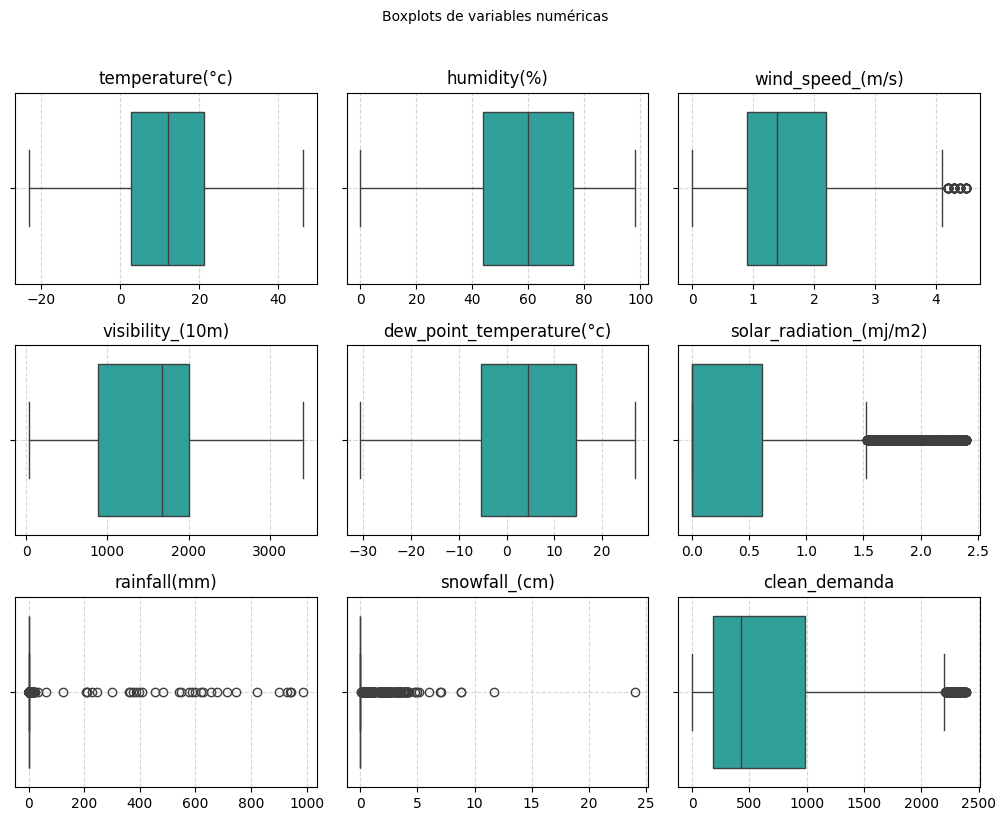

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, color='lightseagreen', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Boxplots de variables numéricas', fontsize=10, y=1.02)
plt.tight_layout()
plt.show()

Y con lo anterior, es posible notar que `rainfall` y `snowfall` tienden a mostrar bastantes casos atípicos filtrando por medio de los valores máximos históricos para la ciudad de Seul.

Ahora bien, este filtrado nos quedamos solamente con `7363` registros, lo que representó la eliminación de 14.43%. Con esto, decidimos eliminar estos registros ya que, aparte de que muchos valores son históricamente incorrectos, varios de los registros filtrados hacia afuera pudieron ser manipulados.

### Reparando el feature `Hour`

Revisando los valores de Hour, notamos que existen varios de miles, pero al parecer el dataset contiene algunos datos los cuales han sido multiplcados por un factor de 100. Por lo tanto, implementamos la siguiente estrategia:

- Dividir dentro de 100 aquellas "horas" que sean mayores a 1000
- Las horas registradas que sean mayores a 24 y menores a 100, se dividirán dentro de 10

In [46]:
def correct_hour(x):
    
    if 0 <= x <= 23:
        return int(x)
    
    if x == 24:
        return 0
    
    if x == 100:
        return 10
    
    if x >= 100:
        return int(str(int(x)).zfill(4)[:2])
    
    return 0


df['hour'] = df['hour'].apply(correct_hour)
        
        

### Buscando algunas tendencias

Text(0.5, 1.0, 'Demanda de bicicletas por fecha')

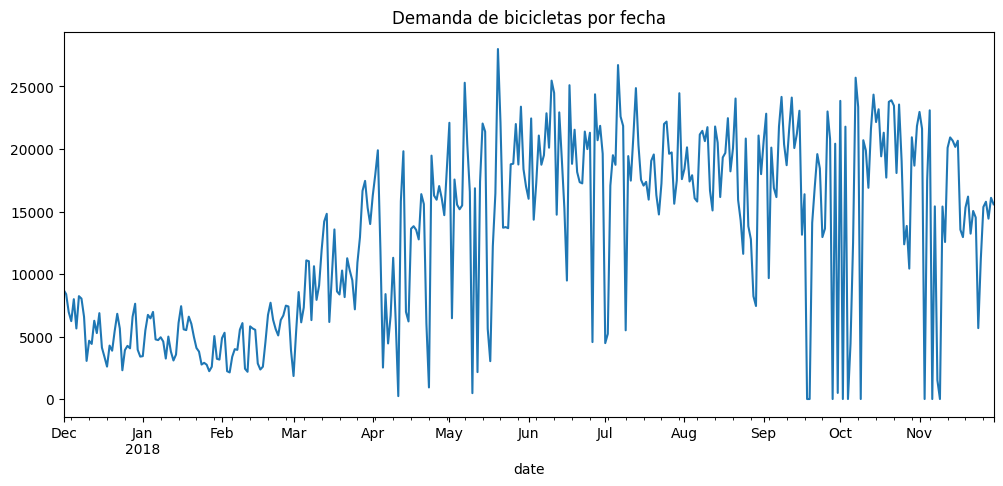

In [47]:
df.groupby('date')['clean_demanda'].sum().plot(figsize=(12,5))

plt.title("Demanda de bicicletas por fecha")

Text(0.5, 1.0, 'Demanda vs Hora')

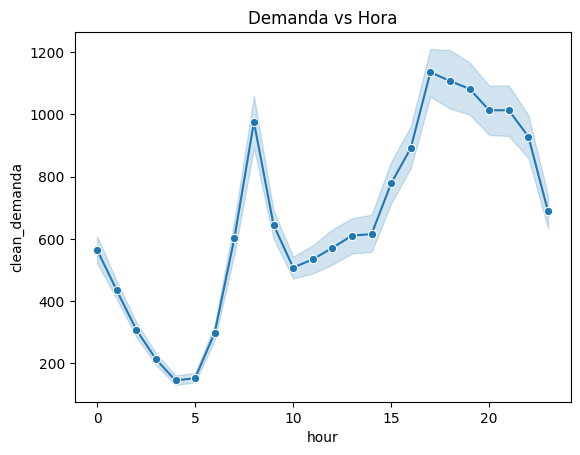

In [48]:
sns.lineplot(data=df, x='hour', y='clean_demanda', marker='o')
plt.title("Demanda vs Hora")

Text(0.5, 1.0, 'Demanda vs Hora')

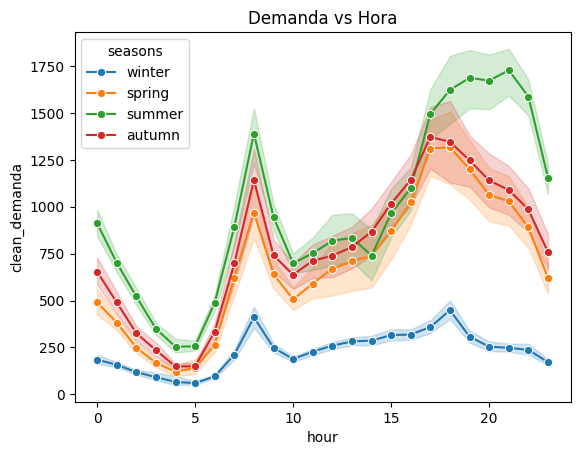

In [49]:
sns.lineplot(data=df, x='hour', y='clean_demanda', hue='seasons', marker='o')
plt.title('Demanda vs Hora')

<Axes: xlabel='temperature(°c)', ylabel='clean_demanda'>

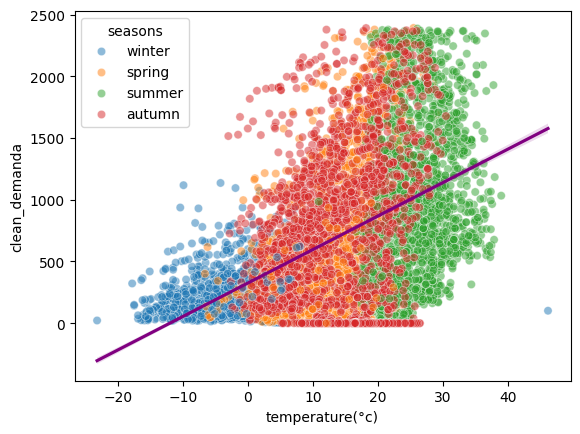

In [50]:
sns.scatterplot(data=df, x='temperature(°c)', y='clean_demanda', alpha=0.5, hue='seasons')
sns.regplot(data=df, x='temperature(°c)', y='clean_demanda', scatter=False, color='purple')

<Axes: xlabel='temperature(°c)', ylabel='clean_demanda'>

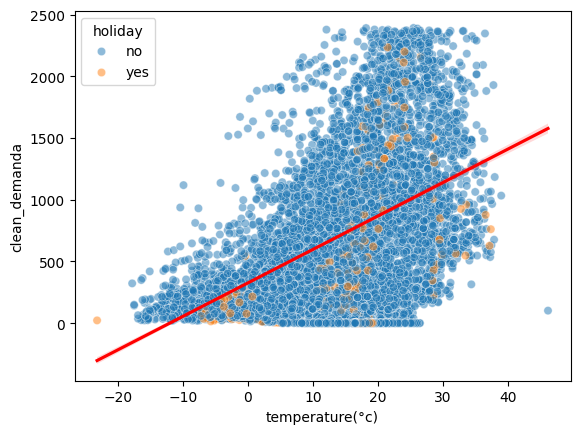

In [51]:
sns.scatterplot(data=df, x='temperature(°c)', y='clean_demanda', alpha=0.5, hue='holiday')
sns.regplot(data=df, x='temperature(°c)', y='clean_demanda', scatter=False, color='red')

<Axes: xlabel='temperature(°c)', ylabel='clean_demanda'>

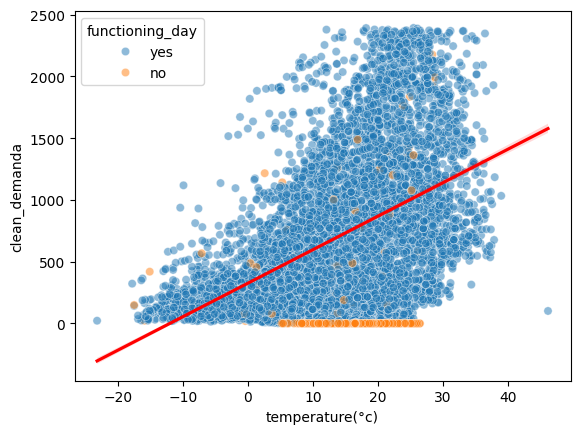

In [52]:
sns.scatterplot(data=df, x='temperature(°c)', y='clean_demanda', alpha=0.5, hue='functioning_day')
sns.regplot(data=df, x='temperature(°c)', y='clean_demanda', scatter=False, color='red')

/tmp/ipykernel_31677/2655992779.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='holiday', y='clean_demanda', palette='Set2')


<Axes: xlabel='holiday', ylabel='clean_demanda'>

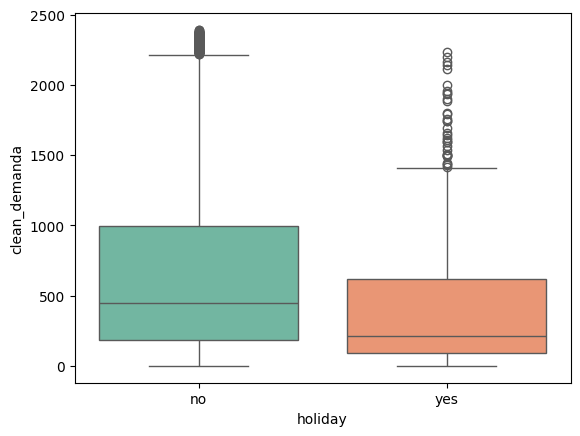

In [53]:
sns.boxplot(data=df, x='holiday', y='clean_demanda', palette='Set2')

<Axes: xlabel='solar_radiation_(mj/m2)', ylabel='clean_demanda'>

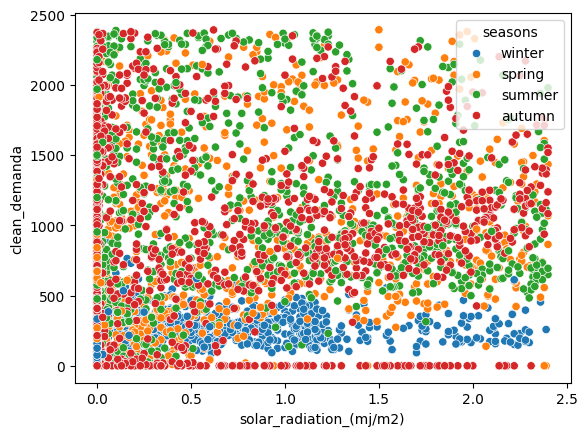

In [54]:
sns.scatterplot(data=df, x='solar_radiation_(mj/m2)', y='clean_demanda', hue='seasons')

/tmp/ipykernel_31677/2360095136.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(df.pivot_table(values='clean_demanda',


<Axes: xlabel='humidity(%)', ylabel='dew_point_temperature(°c)'>

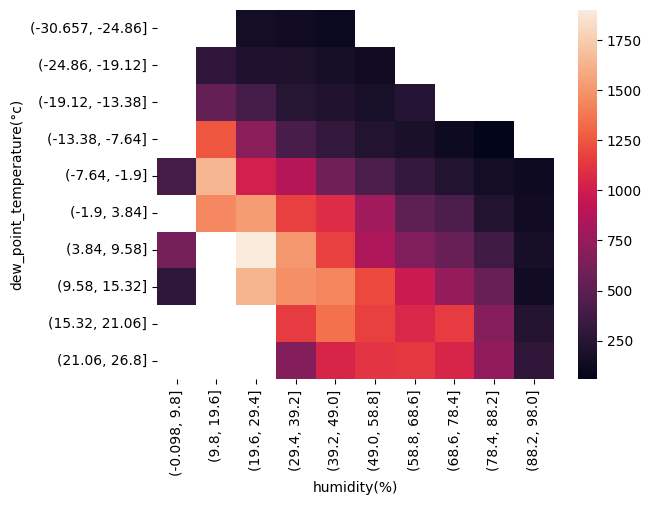

In [55]:
sns.heatmap(df.pivot_table(values='clean_demanda',
                           index=pd.cut(df['dew_point_temperature(°c)'], bins=10),
                           columns=pd.cut(df['humidity(%)'], bins=10),
                           aggfunc='mean'))


<Axes: xlabel='wind_speed_(m/s)', ylabel='clean_demanda'>

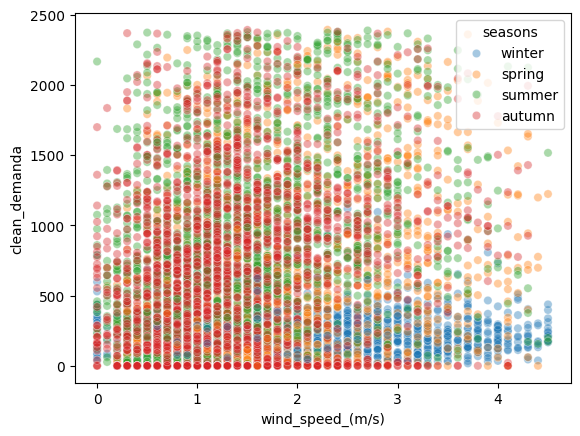

In [56]:
sns.scatterplot(data=df, x='wind_speed_(m/s)', y='clean_demanda', hue='seasons', alpha=0.4)


<Axes: xlabel='visibility_(10m)', ylabel='clean_demanda'>

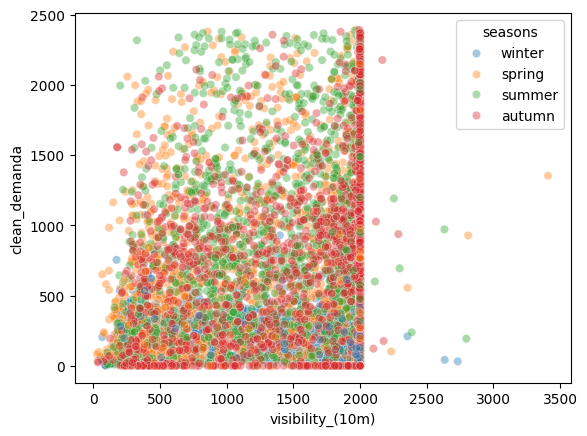

In [57]:
sns.scatterplot(data=df, x='visibility_(10m)', y='clean_demanda', hue='seasons', alpha=0.4)


array([[<Axes: title={'center': 'temperature(°c)'}, xlabel='seasons'>,
        <Axes: title={'center': 'humidity(%)'}, xlabel='seasons'>,
        <Axes: title={'center': 'clean_demanda'}, xlabel='seasons'>]],
      dtype=object)

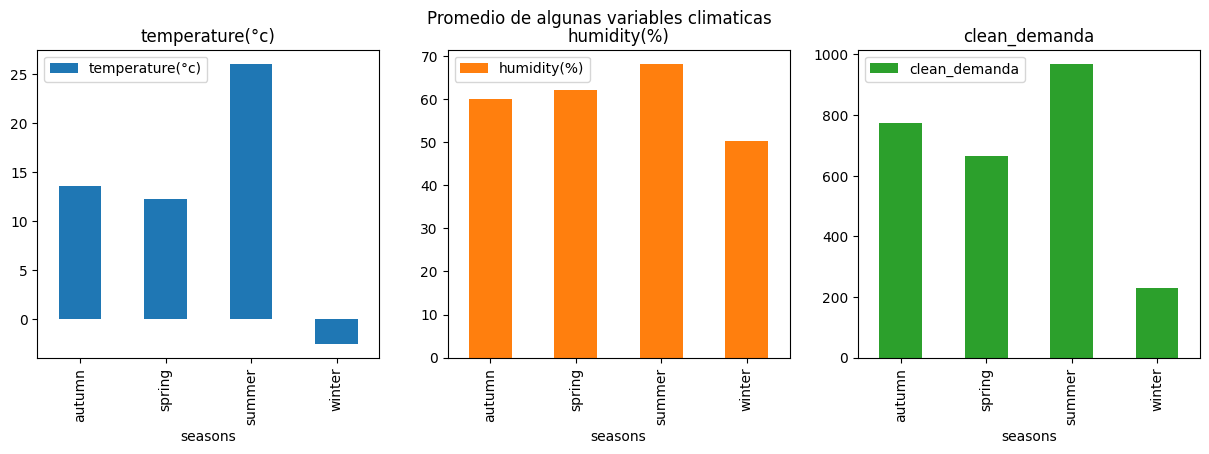

In [58]:
season_summary = df.groupby('seasons')[['temperature(°c)', 'humidity(%)', 'clean_demanda']].mean()
season_summary.plot(kind='bar', subplots=True, layout=(1,3), figsize=(15,4), title="Promedio de algunas variables climaticas")


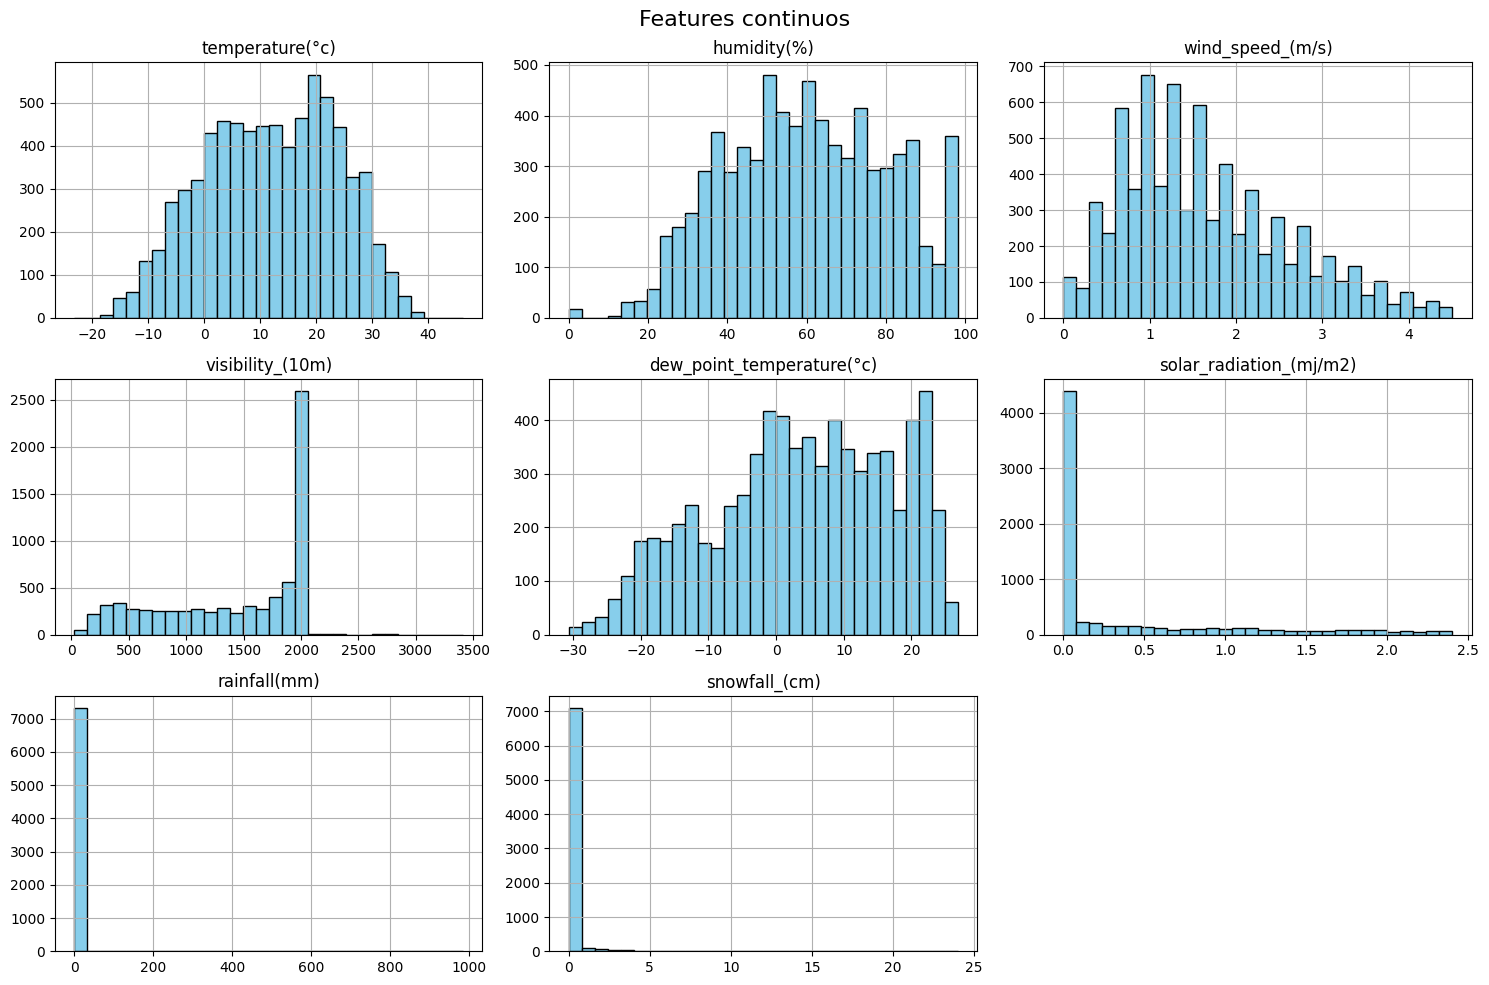

In [59]:
import matplotlib.pyplot as plt

df[weather_cols].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Features continuos", fontsize=16)
plt.tight_layout()
plt.show()


<Axes: >

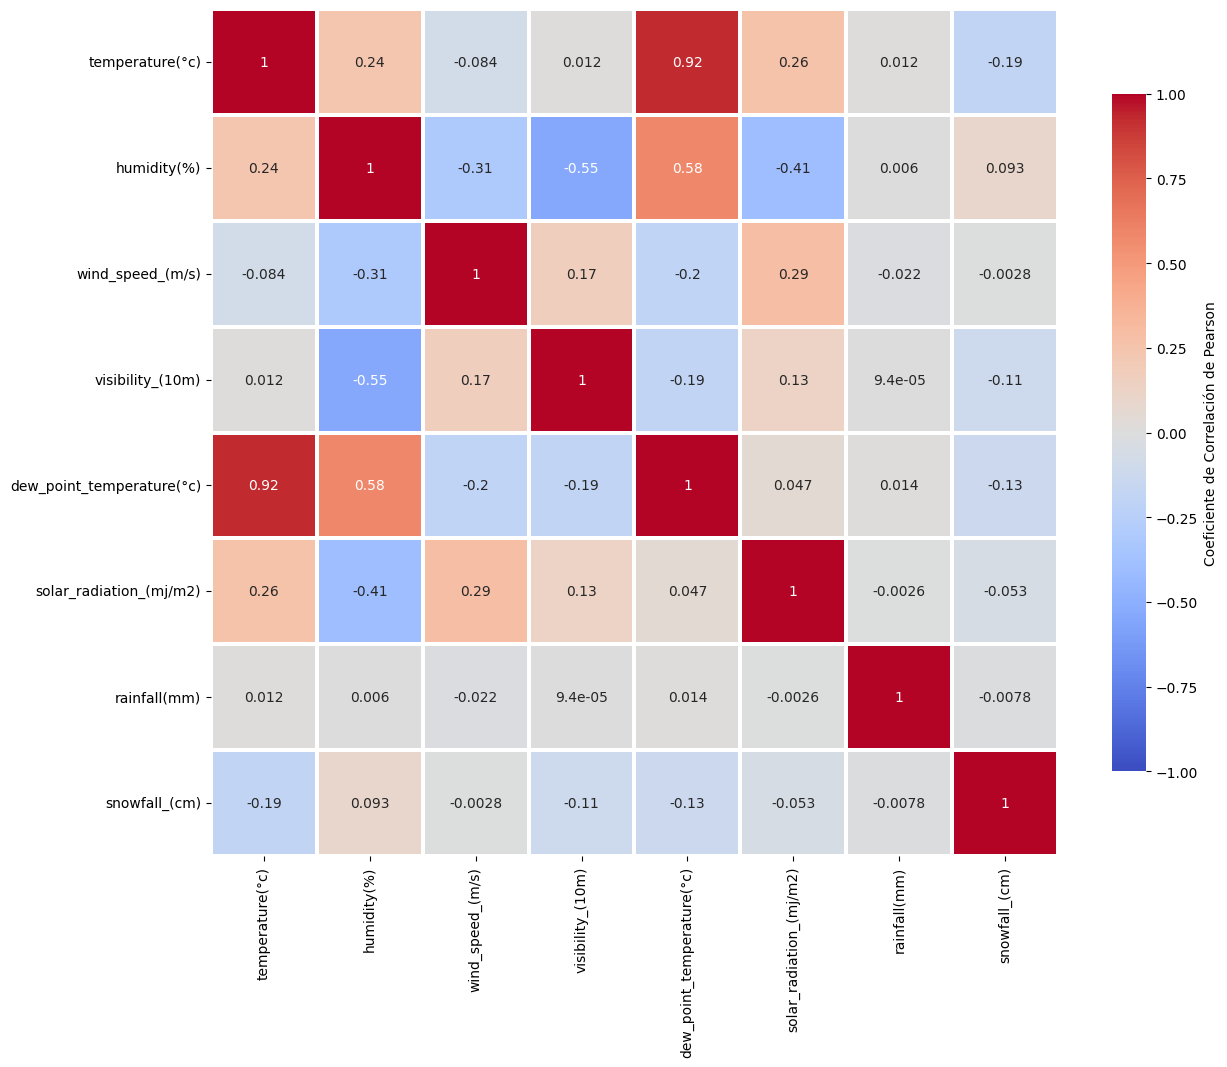

In [60]:
correlation_matrix = df[weather_cols].corr(method='pearson')

plt.figure(figsize=(14, 11))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    square=True,             
    linewidths=1.5,          
    linecolor='white',       
    cbar_kws={
        'shrink': 0.8,
        'label': 'Coeficiente de Correlación de Pearson'
    },
    vmin=-1,                 
    vmax=1,                  
    annot_kws={'size': 10}
)

# Transformaciones Finales (Feature Engineering)

### Factores temporales

Como notamos en el EDA, existen patrones definidos para la demanda de bicicletas según la temporada, por lo que podemos hablar de que existe una estacionalidad.

Con esto, agregaremos columnas cíclicas usando seno y conseno para que nuestro modelo pueda comprender la naturaleza cíclica de nuestras muestras.

In [63]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['day_of_week'] = df['date'].dt.dayofweek

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df.drop(columns=['month', 'day_of_week', 'day_of_year'], inplace=True)

In [64]:
df = pd.get_dummies(df, columns=['seasons', 'holiday', 'functioning_day'], drop_first=True)

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[['temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)',
    'visibility_(10m)', 'dew_point_temperature(°c)',
    'solar_radiation_(mj/m2)']] = scaler.fit_transform(
        df[['temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)',
            'visibility_(10m)', 'dew_point_temperature(°c)',
            'solar_radiation_(mj/m2)']]
    )


In [69]:
df.to_csv('csv/seoul_bike_sharing_feature.csv' )

In [67]:
df.dtypes

date                         datetime64[ns]
hour                                  int64
temperature(°c)                     float64
humidity(%)                         float64
wind_speed_(m/s)                    float64
visibility_(10m)                    float64
dew_point_temperature(°c)           float64
solar_radiation_(mj/m2)             float64
rainfall(mm)                        float64
snowfall_(cm)                       float64
clean_demanda                       float64
year                                  int32
month_sin                           float64
month_cos                           float64
day_of_year_sin                     float64
day_of_year_cos                     float64
day_of_week_sin                     float64
day_of_week_cos                     float64
hour_sin                            float64
hour_cos                            float64
seasons_spring                         bool
seasons_summer                         bool
seasons_winter                  

## Seleccion del Modelo. (Data Scientist Role)
Pasos a ejecutar:
1. Set up inicial y validaicon de variable Y y X. 
2. Validacion de Multicoliniearidad 
3. Significancia estadistica
4. Preparacion de datasets para entrenamiento y testing.
5. Entreanmiento de Modelo y Evaluacion. 

In [1]:
#Set up inicial y validacion de variable Y y X. 
import pandas as pd

df=pd.read_csv('csv/seoul_bike_sharing_feature.csv',index_col=0)

# Variable objetivo
Y=df['clean_demanda']

# De este punto tenemos que quitar de nuestro df las variables de año y de fecha, ya que estas ya esta incluidas como sin y cos. 
X= df.drop(columns=['clean_demanda','date','year'])

print('Caracteristicas a usar:', X.columns.to_list())
print(X.dtypes)

Caracteristicas a usar: ['hour', 'temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'seasons_spring', 'seasons_summer', 'seasons_winter', 'holiday_yes', 'functioning_day_yes']
hour                           int64
temperature(°c)              float64
humidity(%)                  float64
wind_speed_(m/s)             float64
visibility_(10m)             float64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
month_sin                    float64
month_cos                    float64
day_of_year_sin              float64
day_of_year_cos              float64
day_of_week_sin              float64
day_of_week_cos              float64
hour_sin                     fl

In [ ]:
# Se encontro que el dataset tiene booleans que tienen que ser convertidos a numerico para poder ser utilizados en el paso 2 

for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)


X = X.apply(pd.to_numeric, errors='coerce')

if X.isnull().any().any():
    print("WARNING: si algo aparece aqui preguntar al data eng. ")
 
    X = X.fillna(0) 

print("Tipos despues de conversion:")
print(X.dtypes)

Tipos de datos después de la corrección:
hour                           int64
temperature(°c)              float64
humidity(%)                  float64
wind_speed_(m/s)             float64
visibility_(10m)             float64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
month_sin                    float64
month_cos                    float64
day_of_year_sin              float64
day_of_year_cos              float64
day_of_week_sin              float64
day_of_week_cos              float64
hour_sin                     float64
hour_cos                     float64
seasons_spring                 int64
seasons_summer                 int64
seasons_winter                 int64
holiday_yes                    int64
functioning_day_yes            int64
dtype: object


In [5]:
X

,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),month_sin,...,day_of_year_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,seasons_spring,seasons_summer,seasons_winter,holiday_yes,functioning_day_yes
0,0,-1.458782,-1.131408,0.600013,0.934241,-1.614512,-0.621952,0.0,0.0,-2.449294e-16,...,0.869589,-0.433884,-0.900969,0.000000e+00,1.000000e+00,0,0,1,0,1
1,1,-1.484309,-1.081887,-0.864981,0.934241,-1.614512,-0.621952,0.0,0.0,-2.449294e-16,...,0.869589,-0.433884,-0.900969,2.588190e-01,9.659258e-01,0,0,1,0,1
2,2,-1.526854,-1.032365,-0.655696,0.934241,-1.622097,-0.621952,0.0,0.0,-2.449294e-16,...,0.869589,-0.433884,-0.900969,5.000000e-01,8.660254e-01,0,0,1,0,1
3,3,-1.543872,-0.982844,-0.760338,0.934241,-1.614512,-0.621952,0.0,0.0,-2.449294e-16,...,0.869589,-0.433884,-0.900969,7.071068e-01,7.071068e-01,0,0,1,0,1
4,4,-1.526854,-1.180929,0.704656,0.934241,-1.690366,-0.621952,0.0,0.0,-2.449294e-16,...,0.869589,-0.433884,-0.900969,8.660254e-01,5.000000e-01,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,23,1.570422,-0.091463,-0.237126,0.934241,1.328625,-0.621952,0.0,0.0,-8.660254e-01,...,-0.777597,-0.433884,-0.900969,-2.588190e-01,9.659258e-01,0,1,0,0,1
8931,3,0.311090,0.156143,0.076801,0.934241,0.365279,-0.621952,0.0,0.0,5.000000e-01,...,-0.591261,0.781831,0.623490,7.071068e-01,7.071068e-01,1,0,0,0,1
8932,6,0.549342,1.740822,-1.597478,-1.069171,1.047965,-0.621952,0.0,0.0,-1.000000e+00,...,-0.150055,-0.974928,-0.222521,1.000000e+00,6.123234e-17,0,0,0,0,1
8933,7,0.200473,1.443695,-1.074265,-0.406183,0.668695,-0.575842,0.0,0.0,-8.660254e-01,...,0.107381,-0.781831,0.623490,9.659258e-01,-2.588190e-01,0,0,0,0,1


In [6]:
## 2.Validacion de caracteristicas 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 
X_vif = add_constant(X)

# Calculo de VIF por cada caracteristica
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(len(X_vif.columns))]


print(vif_data.sort_values(by='VIF', ascending=False))

                      feature        VIF
6   dew_point_temperature(°c)  95.945147
2             temperature(°c)  69.218162
13            day_of_year_cos  53.290965
11                  month_cos  51.109883
10                  month_sin  49.684887
12            day_of_year_sin  45.036380
0                       const  40.203821
3                 humidity(%)  15.121305
18             seasons_spring   9.177020
20             seasons_winter   5.528245
19             seasons_summer   5.441383
16                   hour_sin   3.400131
7     solar_radiation_(mj/m2)   3.069337
1                        hour   2.645742
17                   hour_cos   2.396556
5            visibility_(10m)   2.075910
4            wind_speed_(m/s)   1.345675
9               snowfall_(cm)   1.110045
22        functioning_day_yes   1.080093
21                holiday_yes   1.051500
14            day_of_week_sin   1.019078
15            day_of_week_cos   1.011165
8                rainfall(mm)   1.001544


In [7]:
#iteracion 1, eliminar dew point y evaluar de nuevo los resultados. 

features_to_drop_in_iter1 = ['dew_point_temperature(°c)']
X_iter1 = X.drop(columns=features_to_drop_in_iter1, errors='ignore')


X_vif_iter1 = add_constant(X_iter1) 

vif_data_iter1 = pd.DataFrame()
vif_data_iter1['feature'] = X_vif_iter1.columns
vif_data_iter1['VIF'] = [variance_inflation_factor(X_vif_iter1.values, i) 
                         for i in range(len(X_vif_iter1.columns))]

print("--- Resultados VIF - Iteración 1 (sin Dew Point Temp) ---")
print(vif_data_iter1.sort_values(by='VIF', ascending=False))



--- Resultados VIF - Iteración 1 (sin Dew Point Temp) ---
                    feature        VIF
12          day_of_year_cos  52.753971
10                month_cos  51.045967
9                 month_sin  49.682829
11          day_of_year_sin  44.897579
0                     const  40.102849
2           temperature(°c)  10.645854
17           seasons_spring   9.131584
19           seasons_winter   5.520086
18           seasons_summer   5.409656
15                 hour_sin   3.380936
6   solar_radiation_(mj/m2)   3.043104
3               humidity(%)   2.690026
1                      hour   2.638290
16                 hour_cos   2.395939
5          visibility_(10m)   2.070336
4          wind_speed_(m/s)   1.345433
8             snowfall_(cm)   1.107135
21      functioning_day_yes   1.079817
20              holiday_yes   1.050609
13          day_of_week_sin   1.017730
14          day_of_week_cos   1.009830
7              rainfall(mm)   1.001388


In [8]:
#iteracion 2 eliminar month y dejar day, y evaluar el resultado. 

features_to_drop_in_iter2 = [
    'month_cos', 
    'month_sin'
]

X_iter2 = X_iter1.drop(columns=features_to_drop_in_iter2, errors='ignore')

X_vif_iter2 = add_constant(X_iter2) 

vif_data_iter2 = pd.DataFrame()
vif_data_iter2['feature'] = X_vif_iter2.columns
vif_data_iter2['VIF'] = [variance_inflation_factor(X_vif_iter2.values, i) 
                         for i in range(len(X_vif_iter2.columns))]

print("--- Resultados VIF - Iteraci0n 2 (sin Mes) ---")
print(vif_data_iter2.sort_values(by='VIF', ascending=False))

--- Resultados VIF - Iteraci0n 2 (sin Mes) ---
                    feature        VIF
0                     const  39.386628
10          day_of_year_cos  10.703268
2           temperature(°c)  10.543702
15           seasons_spring   8.157019
9           day_of_year_sin   7.112822
17           seasons_winter   4.993126
16           seasons_summer   4.953305
13                 hour_sin   3.373543
6   solar_radiation_(mj/m2)   3.038906
3               humidity(%)   2.655642
1                      hour   2.637694
14                 hour_cos   2.389792
5          visibility_(10m)   2.019201
4          wind_speed_(m/s)   1.345413
8             snowfall_(cm)   1.086309
19      functioning_day_yes   1.074505
18              holiday_yes   1.034696
11          day_of_week_sin   1.017546
12          day_of_week_cos   1.009646
7              rainfall(mm)   1.001346


In [9]:
#iteracion 3 - eliminar day of year cos

features_to_drop_in_iter3 = ['day_of_year_cos']

X_iter3 = X_iter2.drop(columns=features_to_drop_in_iter3, errors='ignore')

X_vif_iter3 = add_constant(X_iter3) 

vif_data_iter3 = pd.DataFrame()
vif_data_iter3['feature'] = X_vif_iter3.columns
vif_data_iter3['VIF'] = [variance_inflation_factor(X_vif_iter3.values, i) 
                         for i in range(len(X_vif_iter3.columns))]

print("--- Resultados VIF - Iteracion 3 (sin day_of_year_cos) ---")
print(vif_data_iter3.sort_values(by='VIF', ascending=False))


--- Resultados VIF - Iteracion 3 (sin day_of_year_cos) ---
                    feature        VIF
0                     const  39.058190
14           seasons_spring   8.126359
9           day_of_year_sin   6.351503
2           temperature(°c)   5.670481
16           seasons_winter   4.812961
15           seasons_summer   4.227665
12                 hour_sin   3.189816
6   solar_radiation_(mj/m2)   3.034299
1                      hour   2.628284
3               humidity(%)   2.568707
13                 hour_cos   2.368615
5          visibility_(10m)   1.817248
4          wind_speed_(m/s)   1.345189
8             snowfall_(cm)   1.086239
18      functioning_day_yes   1.073685
17              holiday_yes   1.034676
10          day_of_week_sin   1.016157
11          day_of_week_cos   1.009608
7              rainfall(mm)   1.001341


In [12]:
X_iter3.dtypes

hour                         int64
temperature(°c)            float64
humidity(%)                float64
wind_speed_(m/s)           float64
visibility_(10m)           float64
solar_radiation_(mj/m2)    float64
rainfall(mm)               float64
snowfall_(cm)              float64
day_of_year_sin            float64
day_of_week_sin            float64
day_of_week_cos            float64
hour_sin                   float64
hour_cos                   float64
seasons_spring               int64
seasons_summer               int64
seasons_winter               int64
holiday_yes                  int64
functioning_day_yes          int64
dtype: object

In [ ]:
#La iteracion 3 resulto ser estadisticamente robusto para un modleo de regresion ya que todas las variables lograron bajar el vit de 10 ahora en el siguiente paso usaremos OLS , esto se ahce para revisar la relevancia estadistica de cada una de las variables P VALUES.

In [10]:
# 3. Releavancia Estadistica p-values (usando iteracion 3 = Xiter3)
import statsmodels.api as sm

X_final = add_constant(X_iter3) 
Y = df['clean_demanda'] 

model = sm.OLS(Y, X_final).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          clean_demanda   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     466.8
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:29:45   Log-Likelihood:                -54705.
No. Observations:                7363   AIC:                         1.094e+05
Df Residuals:                    7344   BIC:                         1.096e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [15]:
#De este paso tendremos que generar una iteracoin adicional sera la numero 4 donde dropearemos todas las variables donde p>t >0.05 , en este caso son wind speed, solar radiation, rainfall 

features_to_drop_in_iter4 = [
    'wind_speed_(m/s)', 
    'solar_radiation_(mj/m2)', 
    'rainfall(mm)'
]

X_iter4 = X_iter3.drop(columns=features_to_drop_in_iter4, errors='ignore')


X_final_ols = sm.add_constant(X_iter4) 

model_final = sm.OLS(Y, X_final_ols).fit()


print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:          clean_demanda   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     558.3
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:39:07   Log-Likelihood:                -54712.
No. Observations:                7363   AIC:                         1.095e+05
Df Residuals:                    7347   BIC:                         1.096e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.6945    

In [ ]:
#Con esta iteracion damos por sifnificante estadisticamente el dataset X_iter4. 

In [16]:
#4. Preparacion de datasets para entrenamiento y testing.

X_clean = X_iter4.drop(columns='const', errors='ignore')

# Definir la variable objetivo Y
Y = df['clean_demanda']

# 1. Definir la lista final de features (para documentación MLOps)
final_features_list = X_clean.columns.tolist()

print("El conjunto FINAL es:")
print(final_features_list)


El conjunto FINAL es:
['hour', 'temperature(°c)', 'humidity(%)', 'visibility_(10m)', 'snowfall_(cm)', 'day_of_year_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'seasons_spring', 'seasons_summer', 'seasons_winter', 'holiday_yes', 'functioning_day_yes']


In [17]:
# Splitear en train y test
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba 80/20
X_train, X_test, Y_train, Y_test = train_test_split(
    X_clean, 
    Y, 
    test_size=0.2, 
    random_state=42 
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Tamaño de X_train: (5890, 15)
Tamaño de X_test: (1473, 15)


In [18]:
# 5. Entreanmiento de Modelo y Evaluacion. 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


modelo_final = Ridge(alpha=1.0) 
modelo_final.fit(X_train, Y_train)


Y_pred = modelo_final.predict(X_test)


rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"RMSE  en Test: {rmse:.2f}")
print(f"R-squared en Test: {r2:.3f}")

RMSE  en Test: 405.32
R-squared en Test: 0.552


In [19]:
#Entregable adicional para el equipo MLOPS (Ing mlops)
import joblib

# Lista de CARACTERISTICAS USADAS (X_clean.columns.tolist())
final_features_list = X_clean.columns.tolist() 

# Serializar el modelo (guardar el artefacto)
modelo_filename = 'modelo_ridge_demanda_bicicletas.joblib'
joblib.dump(modelo_final, modelo_filename)


with open('features_finales.txt', 'w') as f:
    f.write(','.join(final_features_list)) 

print(f"modelo guardado como: {modelo_filename}")
print(f"Lista de caracteristicas guardada en: features_finales.txt")

modelo guardado como: modelo_ridge_demanda_bicicletas.joblib
Lista de caracteristicas guardada en: features_finales.txt
